In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Trabalho de Referência  
https://python.plainenglish.io/creating-machine-learning-models-to-predict-football-game-outcomes-70b6bf02885c  
https://github.com/RishiSankhe/FbMatchPredictor

Importando Pacotes

In [4]:
# !pip install -r requirements.txt

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Configurações do codigo

In [6]:
#Exibir totas as colunas no pandas
pd.set_option('display.max_columns', None)
season = 2023

### Importando a Base Tratada

In [7]:
data = pd.read_excel(f'data/trusted/base_brasileirao_{season}.xlsx')
data.head()

,fixture.id,fixture.date,league.round,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,result,result.team,HTR,home.pf.drw,home.pf.win,home.pf.los,away.pf.drw,away.pf.win,away.pf.los,home.BLPS,home.BSH,home.CK,home.EXPGL,home.FOU,home.GKSV,home.OFSD,home.PAS%,home.PASAC,home.RCD,home.SHFG,home.SHIN,home.SHOG,home.SHOU,home.TPAS,home.TSH,home.YCD,away.BLPS,away.BSH,away.CK,away.EXPGL,away.FOU,away.GKSV,away.OFSD,away.PAS%,away.PASAC,away.RCD,away.SHFG,away.SHIN,away.SHOG,away.SHOU,away.TPAS,away.TSH,away.YCD
0,1005649,2023-04-16,1,127,Flamengo,True,147,Coritiba,False,1,0,3,0,1,Flamengo,1,NaN,NaN,NaN,NaN,NaN,NaN,59,3,6,1.37,20,3,1,89,480,0,5,5,7,10,542,15,3,41,5,3,0.36,17,4,2,85,322,0,2,3,3,7,379,10,3
1,1005650,2023-04-15,1,120,Botafogo,True,126,Sao Paulo,False,1,1,2,1,1,Botafogo,0,NaN,NaN,NaN,NaN,NaN,NaN,32,4,3,0.84,20,7,2,78,229,0,5,6,3,6,293,12,3,68,2,7,1.86,13,1,1,89,574,0,6,11,8,5,646,16,2
2,1005651,2023-04-15,1,121,Palmeiras,True,1193,Cuiaba,False,1,1,2,1,1,Palmeiras,0,NaN,NaN,NaN,NaN,NaN,NaN,52,5,4,2.69,23,3,3,84,382,0,7,10,5,7,455,17,2,48,2,4,0.67,12,3,2,79,337,1,6,6,4,6,426,12,5
3,1005652,2023-04-16,1,131,Corinthians,True,135,Cruzeiro,False,0,0,2,1,1,Corinthians,0,NaN,NaN,NaN,NaN,NaN,NaN,42,1,7,1.54,14,1,4,78,316,0,4,6,7,6,406,12,4,58,3,4,0.49,12,5,3,85,489,0,3,4,2,4,572,8,2
4,1005653,2023-04-15,1,794,RB Bragantino,True,118,Bahia,False,0,1,2,1,1,RB Bragantino,-1,NaN,NaN,NaN,NaN,NaN,NaN,56,2,4,2.11,20,2,2,78,339,0,4,6,7,7,436,13,3,44,1,7,0.65,13,5,3,72,248,0,5,5,3,4,343,9,1


In [8]:
matches = data.shape[0]
columns = data.shape[1]

home_win = len(data[data['result'] == 1])
away_win = len(data[data['result'] == -1])
draw_win = len(data[data['result'] == 0])

print('Qtd Partidas:', matches)
print('Qtd Colunas:', columns)
print('Vit Mandante:', home_win)
print('Vit Visitante:', away_win)
print('Empate:', draw_win)
print('% Mandante:', round(home_win/matches*100,2))
print('% Visitante:', round(away_win/matches*100,2))
print('% Empate:', round(draw_win/matches*100,2))

Qtd Partidas: 380
Qtd Colunas: 56
Vit Mandante: 178
Vit Visitante: 104
Empate: 98
% Mandante: 46.84
% Visitante: 27.37
% Empate: 25.79


In [9]:
data2 = data.copy()
data['teams.home.winner'] = data['teams.home.winner'].astype('int')
data['teams.away.winner'] = data['teams.away.winner'].astype('int')

In [10]:
df_home_winner = data2.groupby('teams.home.name')['teams.home.winner'].agg(['sum', 'count']).reset_index()
df_home_winner['percent'] = df_home_winner['sum']/df_home_winner['count']
df_home_winner.to_clipboard()


df_home_winner

,teams.home.name,sum,count,percent
0,America Mineiro,5,19,0.263158
1,Atletico Paranaense,10,19,0.526316
2,Atletico-MG,11,19,0.578947
3,Bahia,8,19,0.421053
4,Botafogo,11,19,0.578947
5,Corinthians,6,19,0.315789
6,Coritiba,4,19,0.210526
7,Cruzeiro,4,19,0.210526
8,Cuiaba,6,19,0.315789
9,Flamengo,10,19,0.526316


In [11]:
data3 = data.copy()
data3 = data3[['fixture.id','teams.home.name', 'teams.away.name',
               'score.halftime.home', 'score.halftime.away',
               'score.fulltime.home', 'score.fulltime.away',
               'HTR', 'result']]
data3.to_clipboard()

data3

,fixture.id,teams.home.name,teams.away.name,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,HTR,result
0,1005649,Flamengo,Coritiba,1,0,3,0,1,1
1,1005650,Botafogo,Sao Paulo,1,1,2,1,0,1
2,1005651,Palmeiras,Cuiaba,1,1,2,1,0,1
3,1005652,Corinthians,Cruzeiro,0,0,2,1,0,1
4,1005653,RB Bragantino,Bahia,0,1,2,1,-1,1
...,...,...,...,...,...,...,...,...,...
375,1006024,Cruzeiro,Palmeiras,0,1,1,1,-1,0
376,1006025,Internacional,Botafogo,1,0,3,1,1,1
377,1006026,Coritiba,Corinthians,0,2,0,2,-1,-1
378,1006027,Bahia,Atletico-MG,2,1,4,1,1,1


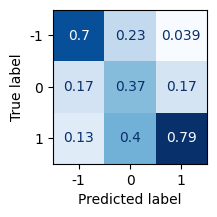

In [15]:
fig, ax = plt.subplots(figsize=(2,2))
cm = confusion_matrix(data3['result'], data3['HTR'], normalize='pred')
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=[-1,0,1])

cm_display.plot(ax=ax, colorbar=False, cmap='Blues')